In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize 

In [2]:
A = (-43.9048056327210225) / (np.pi**2 * 800 * 9.1093837)
B = (2.5669699537181569) / (8.854187817 * 4 * np.pi)

In [16]:
def numerator(k):
    def integrand(r):
        return np.exp(-2 * k * r) / r
    return integrate.quad(integrand, 1e-18, 0.1)[0] + \
           integrate.quad(integrand, 0.1, np.abs(10. * k))[0]


def denominator(k):
    def integrand(r):
        return np.exp(-2 * k * r)
    return integrate.quad(integrand, 1e-18, np.abs(10. * k))[0]

def I(k):
    return numerator(k)/denominator(k)

def E(k):
    return A * k**2 + B * I(k)

In [17]:
solution = optimize.minimize(E, [0.1], bounds=[(0, np.inf)])

/tmp/ipykernel_3388/152234057.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 1e-18, 0.1)[0] + \


In [18]:
solution

      fun: 0.669511121892002
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.22044605e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 22
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([0.25242623])

/tmp/ipykernel_3388/152234057.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 1e-18, 0.1)[0] + \


(0.01, 1000000000.0)

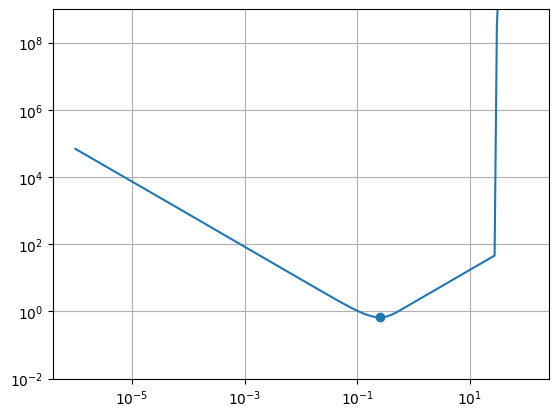

In [19]:
k = np.logspace(-6, 2, 200, base=10)
Ev = np.vectorize(E)

fig, axe = plt.subplots()
axe.loglog(k, Ev(k))
axe.scatter(solution.x, Ev(solution.x))
axe.grid()
axe.set_ylim([1e-2, 1e9])

In [20]:
Ev(k)

/tmp/ipykernel_3388/152234057.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 1e-18, 0.1)[0] + \


array([6.90597589e+04, 6.31487814e+04, 5.77431888e+04, 5.27998210e+04,
       4.82791995e+04, 4.41452132e+04, 4.03648319e+04, 3.69078440e+04,
       3.37466156e+04, 3.08558715e+04, 2.82124940e+04, 2.57953387e+04,
       2.35850665e+04, 2.15639896e+04, 1.97159308e+04, 1.80260943e+04,
       1.64809485e+04, 1.50681174e+04, 1.37762824e+04, 1.25950923e+04,
       1.15150801e+04, 1.05275883e+04, 9.62469908e+03, 8.79917156e+03,
       8.04438395e+03, 7.35428063e+03, 6.72332378e+03, 6.14644920e+03,
       5.61902585e+03, 5.13681878e+03, 4.69595539e+03, 4.29289437e+03,
       3.92439745e+03, 3.58750345e+03, 3.27950465e+03, 2.99792508e+03,
       2.74050070e+03, 2.50516131e+03, 2.29001397e+03, 2.09332781e+03,
       1.91352017e+03, 1.74914398e+03, 1.59887607e+03, 1.46150664e+03,
       1.33592953e+03, 1.22113334e+03, 1.11619334e+03, 1.02026405e+03,
       9.32572435e+02, 8.52411731e+02, 7.79135748e+02, 7.12153691e+02,
       6.50925420e+02, 5.94957103e+02, 5.43797258e+02, 4.97033116e+02,
      

In [21]:
I(24)

/tmp/ipykernel_3388/152234057.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 1e-18, 0.1)[0] + \


1775.9221758462263